# Exploratory Data Analysis (EDA)

In [13]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("cleaned_dataset.csv")
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
199994,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1
199995,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1
199996,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2
199997,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1


In [11]:
# Descriptive statistics for numerical features
desc = df.describe().T  # Transpose for readability
desc['median'] = df.median
desc['mode'] = df.mode().iloc[0]  # First mode (can be multiple)
display(desc[['mean', 'median', 'mode', 'std', 'min', '25%', '50%', '75%', 'max']])


,mean,median,mode,std,min,25%,50%,75%,max
fare_amount,11.359892,<bound method DataFrame.median of ...,6.5,9.901760,-52.000000,6.000000,8.500000,12.500000,499.000000
pickup_longitude,-72.527631,<bound method DataFrame.median of ...,0.0,11.437815,-1340.648410,-73.992065,-73.981823,-73.967154,57.418457
pickup_latitude,39.935881,<bound method DataFrame.median of ...,0.0,7.720558,-74.015515,40.734796,40.752592,40.767158,1644.421482
dropoff_longitude,-72.525292,<bound method DataFrame.median of ...,0.0,13.117408,-3356.666300,-73.991407,-73.980093,-73.963658,1153.572603
dropoff_latitude,39.923890,<bound method DataFrame.median of ...,0.0,6.794829,-881.985513,40.733823,40.753042,40.768001,872.697628
passenger_count,1.684543,<bound method DataFrame.median of ...,1.0,1.385995,0.000000,1.000000,1.000000,2.000000,208.000000


In [14]:
# Function to compute IQR and detect outliers
def iqr_outlier_analysis(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]

    return {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Range': series.max() - series.min(),
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': len(outliers)
    }

# Apply to relevant numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

iqr_stats = {}
for col in numerical_cols:
    iqr_stats[col] = iqr_outlier_analysis(df[col])

# Convert to DataFrame
iqr_df = pd.DataFrame(iqr_stats).T
display(iqr_df)


,Q1,Q3,IQR,Range,Lower Bound,Upper Bound,Outlier Count
fare_amount,6.000000,12.500000,6.500000,551.000000,-3.750000,22.250000,17166.0
pickup_longitude,-73.992065,-73.967154,0.024911,1398.066867,-74.029431,-73.929788,13559.0
pickup_latitude,40.734796,40.767158,0.032362,1718.436997,40.686252,40.815702,9423.0
dropoff_longitude,-73.991407,-73.963658,0.027749,4510.238903,-74.033030,-73.922036,14200.0
dropoff_latitude,40.733823,40.768001,0.034178,1754.683141,40.682557,40.819268,12145.0
passenger_count,1.000000,2.000000,1.000000,208.000000,-0.500000,3.500000,22557.0


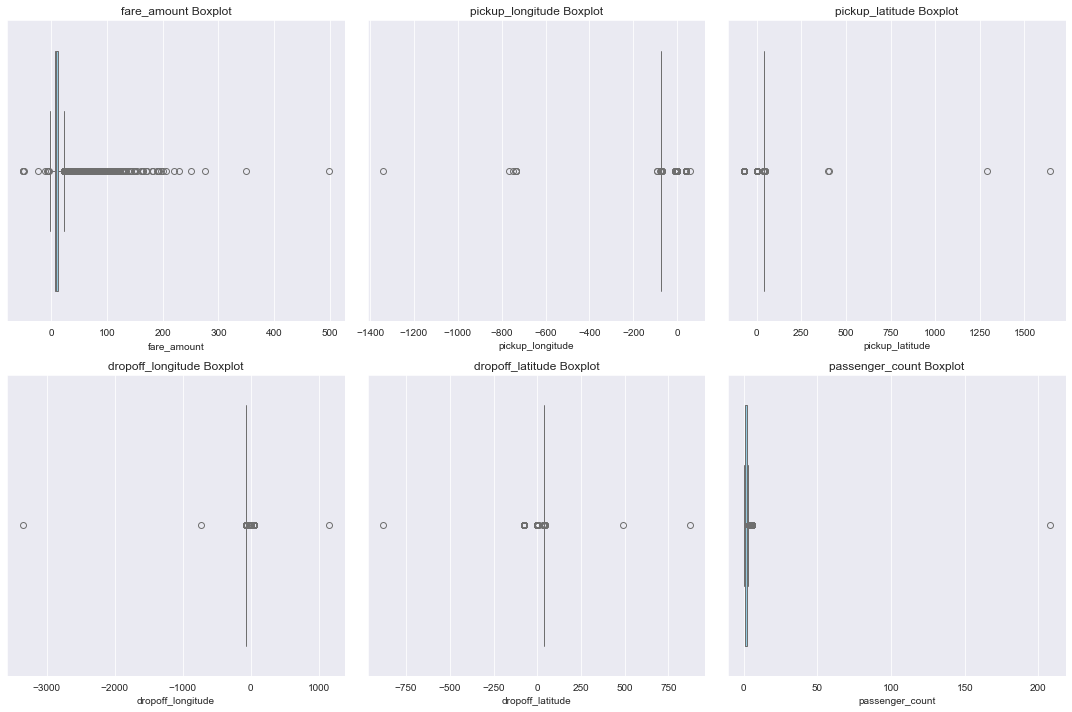

In [15]:
# Boxplots for all numerical features
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()


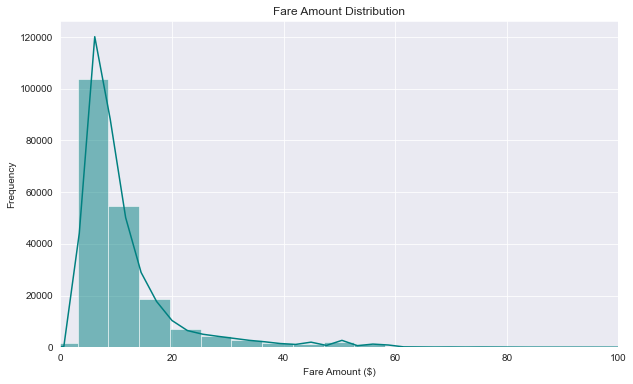

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['fare_amount'], bins=100, kde=True, color='teal')
plt.title('Fare Amount Distribution')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.xlim(0, 100)  # Limit to $100 to avoid long tail effect
plt.show()


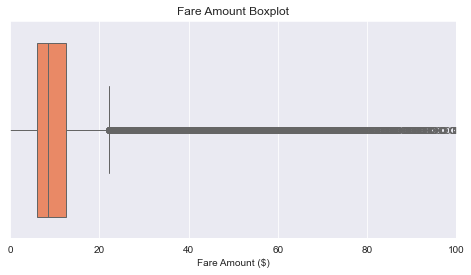

In [17]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['fare_amount'], color='coral')
plt.title('Fare Amount Boxplot')
plt.xlabel('Fare Amount ($)')
plt.xlim(0, 100)  # Optional: restrict view to focus on majority
plt.show()


/Users/MAC/Downloads/BigData_Notes/Assignments/Assignment1/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


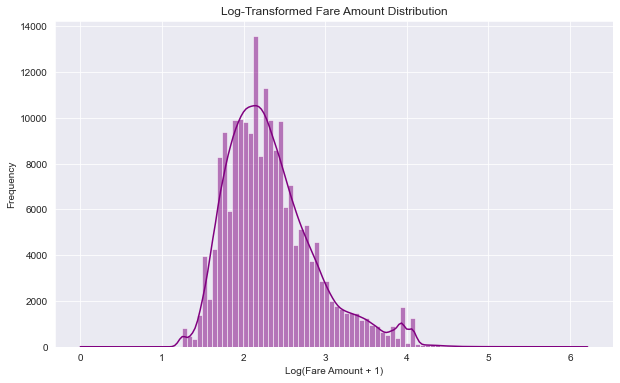

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df['fare_amount']), bins=100, kde=True, color='purple')
plt.title('Log-Transformed Fare Amount Distribution')
plt.xlabel('Log(Fare Amount + 1)')
plt.ylabel('Frequency')
plt.show()


In [19]:
import numpy as np

def haversine_distance(lat1, lon1, lat2, lon2):
    # Earth radius in km
    R = 6371
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Create a new distance column
df['distance_km'] = haversine_distance(
    df['pickup_latitude'], df['pickup_longitude'],
    df['dropoff_latitude'], df['dropoff_longitude']
)


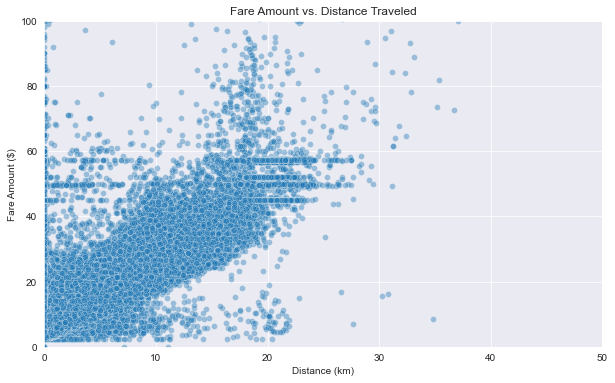

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_km', y='fare_amount', data=df, alpha=0.4)
plt.title('Fare Amount vs. Distance Traveled')
plt.xlabel('Distance (km)')
plt.ylabel('Fare Amount ($)')
plt.xlim(0, 50)
plt.ylim(0, 100)
plt.show()


In [25]:
# Fix datetime parsing
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

# Drop rows where datetime could not be parsed (optional but safe)
df = df.dropna(subset=['pickup_datetime'])

# Extract time features
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek


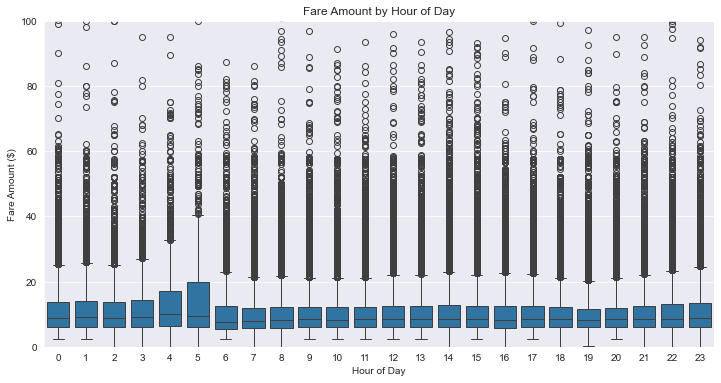

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='fare_amount', data=df)
plt.title('Fare Amount by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fare Amount ($)')
plt.ylim(0, 100)
plt.show()


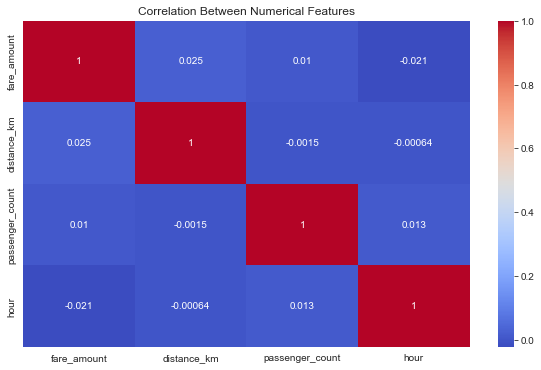

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['fare_amount', 'distance_km', 'passenger_count', 'hour']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Features')
plt.show()
